## Часть 1

**Шаг 1**. Сначала импортирую все необходимые библиотеки

In [135]:
import requests
import numpy as np
import rdkit
from rdkit import Chem, DataStructs
import pandas as pd
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs
rdDepictor.SetPreferCoordGen(True)

rdkit.__version__

'2020.09.1'

**Шаг 2**. Теперь необходимо скачать необходимое данные, используя CIDs веществ. Скачиваю в формате .csv по api, с чем мне помог этот сайт https://pubchemdocs.ncbi.nlm.nih.gov/pug-rest

In [284]:
with open('chem_id_pubmed.txt') as chem_id: # открываю файл, в котором указаны CIDs
# читаю файл, при этом в переменную записываю cids через запятую. Это понадобится для создания ссылки
    k = ','.join(chem_id.read().splitlines())
urlCID = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/' + k + '/property/CanonicalSMILES,MolecularFormula,Fingerprint2D/CSV' # создаю ссылку для скачивания
CIDinfo = requests.get(urlCID, allow_redirects=True) # делаю запрос
with open('Chem_CID_result.csv', 'wb') as result: # создаю файл, куда записываю полученный результат
    y = result.write(CIDinfo.content)

print(urlCID)


https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/459803,91899426,286003,47289,451668,16218924,60961,2051,2126,9810212,135400486,25099184,2303,82146,448949,25150857,53789347,1080352,23891512,9687,264,512282,5943,11345983,2662/property/CanonicalSMILES,MolecularFormula,Fingerprint2D/CSV


**Шаг 3**. Перезапись csv в sdf формат

In [4]:
with open('Chem_CID_result.csv', 'r') as chem_file: # открываю csv файл из предыдущей яйчейки
    csv_chem = pd.read_csv(chem_file)

with open('ChemSDF.sdf','w') as f: #создаю новый файл для записи предыдущих данных в формат sdf
    for row in csv_chem.CanonicalSMILES:
        mol = Chem.MolFromSmiles(row)
        mol_block = Chem.MolToMolBlock(mol)
        print(mol_block, file=f)
   

**Шаг 4**. Графическое отображение молекул в 2Д формате

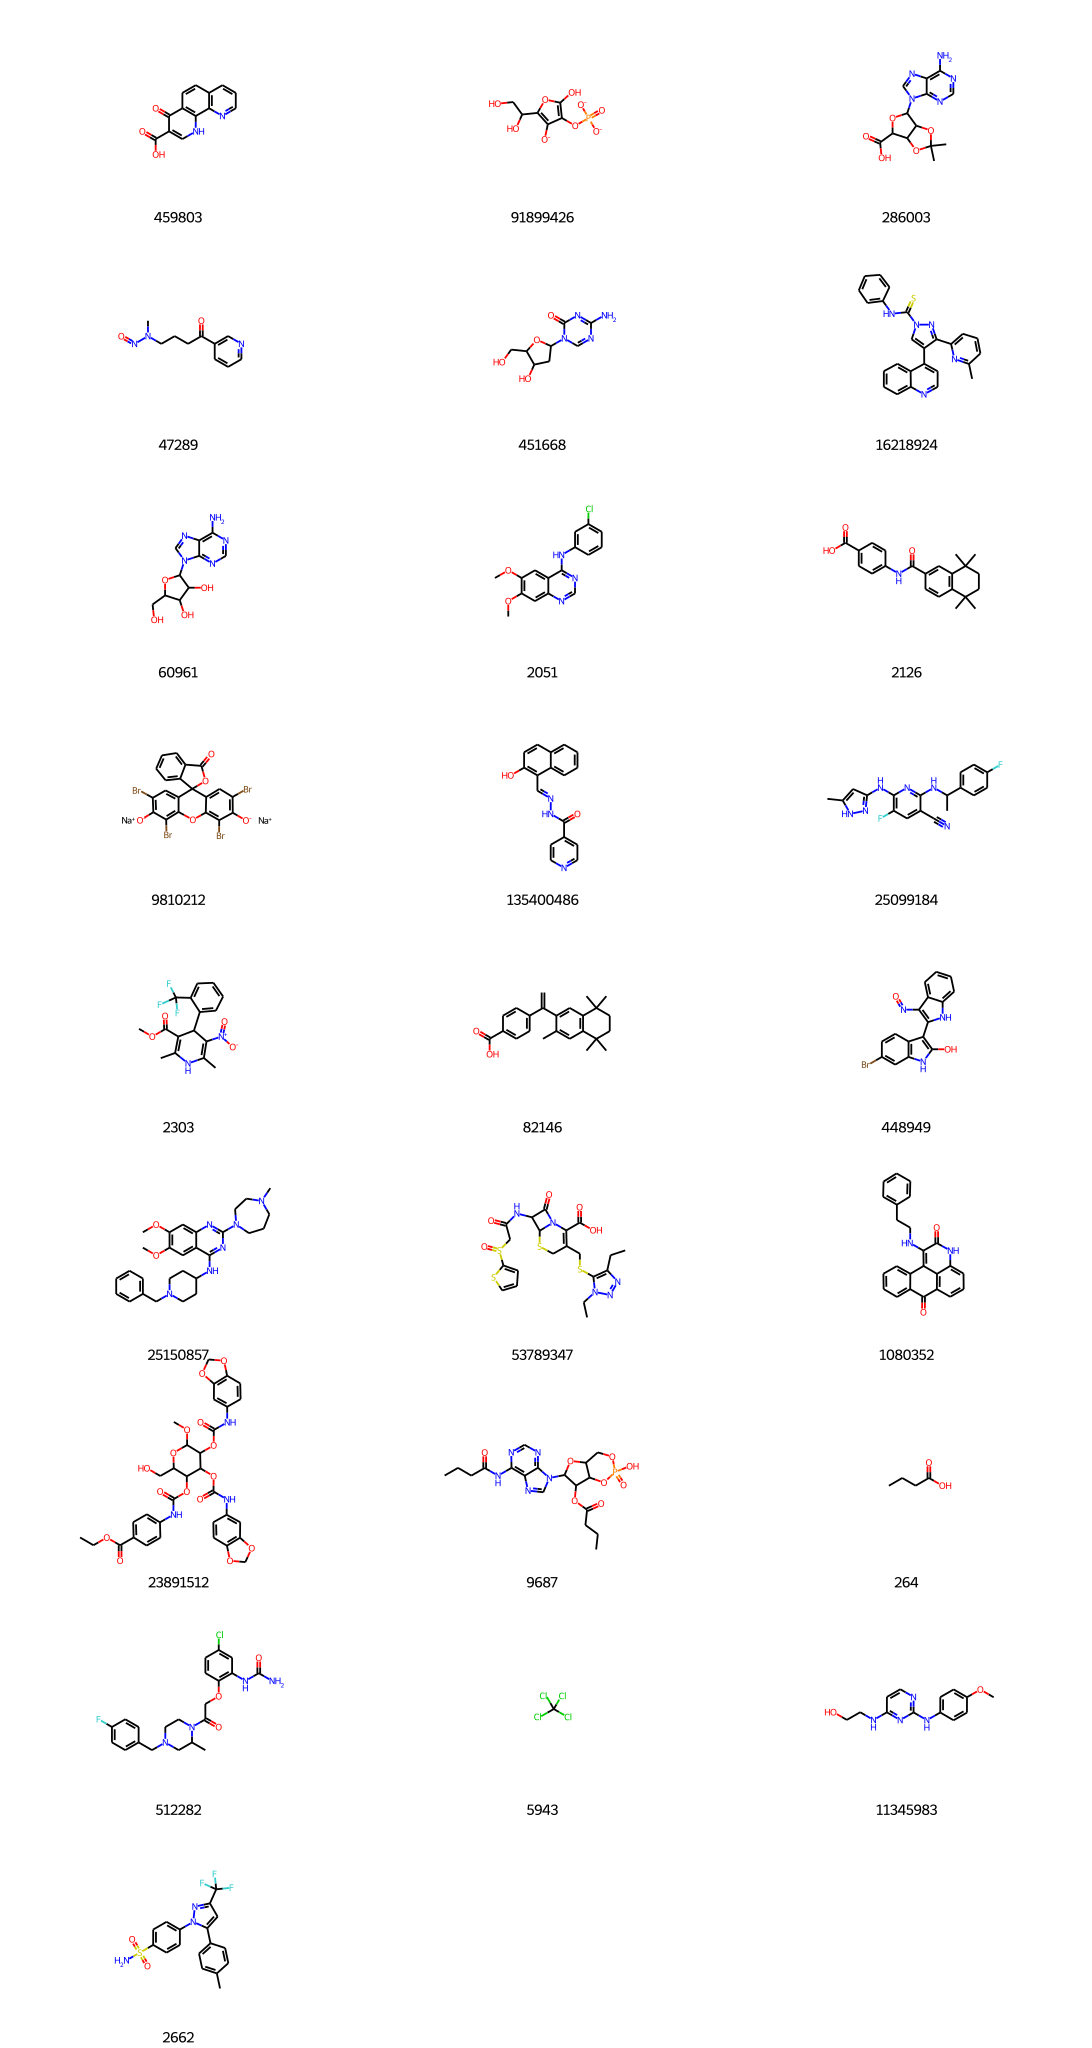

In [247]:
mols = [Chem.MolFromSmiles(smi) for smi in csv_chem.CanonicalSMILES] # создаю список с молекулами проходясь по колонке со smile из предыдущей таблицы
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(400, 250), legends=[str(x) for x in csv_chem.CID]) # тут настраиваю параметры отображения: сколько в ряду, названия

***
Создаю таблицу поприличнее, где графическое отображение вынесено в отдельный столбец


,CID,CanonicalSMILES,MolecularFormula,Fingerprint2D,ROMol
0,459803,C1=CC2=C(C3=C(C=C2)C(=O)C(=CN3)C(=O)O)N=C1,C13H8N2O3,AAADccBzMAAAAAAAAAAAAAAAAAAAAAAAAAA8QIAAAAAAAA...,
1,91899426,C(C(C1=C(C(=C(O1)O)OP(=O)([O-])[O-])[O-])O)O,C6H6O9P-3,AAADcYBgPAIAAAAAAAAAAAAAAAAAASAAAAAAAAAAAAAAAA...,
2,286003,CC1(OC2C(O1)C(OC2C(=O)O)N3C=NC4=C(N=CN=C43)N)C,C13H15N5O5,AAADccBzuAAAAAAAAAAAAAAAAAAAAWJEgAAsAAAAAAASAF...,
3,47289,CN(CCCC(=O)C1=CN=CC=C1)N=O,C10H13N3O2,AAADccBzMAAAAAAAAAAAAAAAAAAAAAAAAAAsAAAAAAAAAA...,
4,451668,C1C(C(OC1N2C=NC(=NC2=O)N)CO)O,C8H12N4O4,AAADccBzuAAAAAAAAAAAAAAAAAAAASAAAAAgAAAAAAAAAA...,
5,16218924,CC1=NC(=CC=C1)C2=NN(C=C2C3=CC=NC4=CC=CC=C34)C(...,C25H19N5S,AAADceB7gABAAAAAAAAAAAAAAAAAAWAAAAA8eIEAAAAAAA...,
6,60961,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)CO)O)O)N,C10H13N5O4,AAADccBzuAAAAAAAAAAAAAAAAAAAAWJAAAAsAAAAAAAAAF...,
7,2051,COC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=CC=C3)Cl)OC,C16H14ClN3O2,AAADccB7MAAEAAAAAAAAAAAAAAAAAAAAAAA8YIAAAAAAAA...,
8,2126,CC1(CCC(C2=C1C=CC(=C2)C(=O)NC3=CC=C(C=C3)C(=O)...,C22H25NO3,AAADceB6MAAAAAAAAAAAAAAAAAAAAAAAAAAwYMAAAAAAAA...,
9,9810212,C1=CC=C2C(=C1)C(=O)OC23C4=CC(=C(C(=C4OC5=C(C(=...,C20H6Br4Na2O5,AAADcYB4ODAAHAAAAAAAAAAAAAAAASAAAAA0YMEAAAAAAE...,

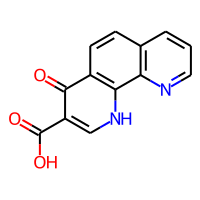
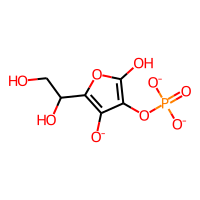
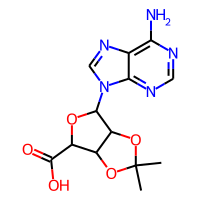
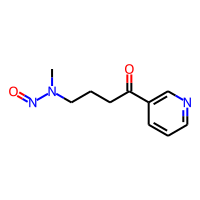
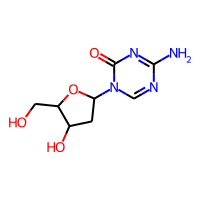
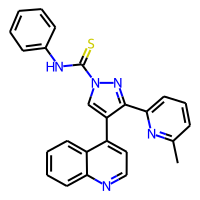
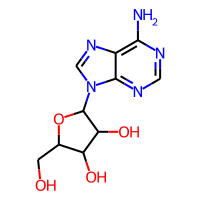
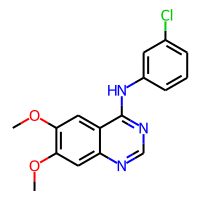
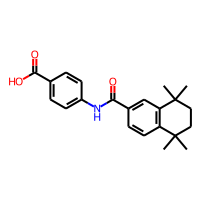
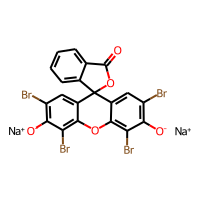
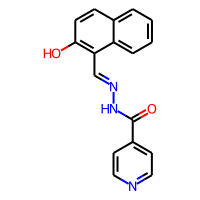
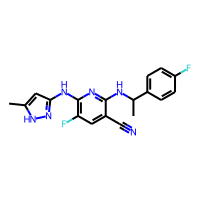
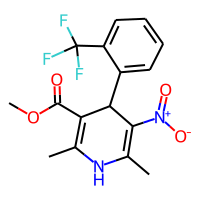
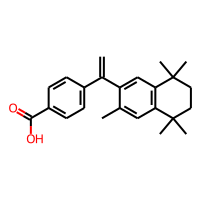
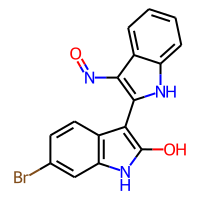
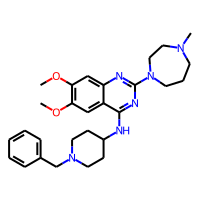
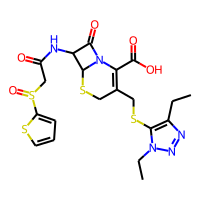
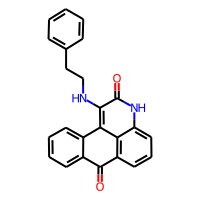
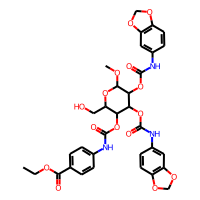
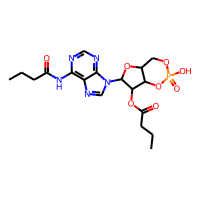
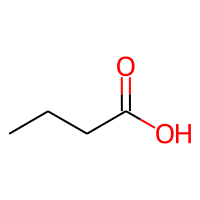
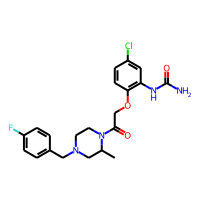
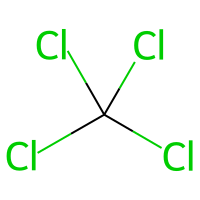
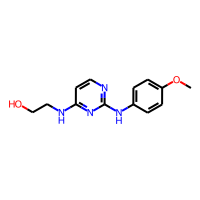
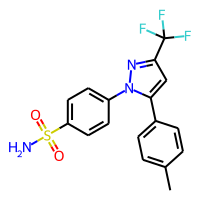

In [243]:
esol_data = pd.read_csv('Chem_CID_result.csv')
PandasTools.AddMoleculeColumnToFrame(esol_data, smilesCol='CanonicalSMILES')
esol_data

## Часть 2
## Evaluate the similarity using MACCSkeys

In [285]:
from rdkit.Chem import MACCSkeys
fpsMAC = [ MACCSkeys.GenMACCSKeys(x) for x in mols] # создаю MACCS ключи для каждого соединения 
MACscores=[] # создаю пустой список, куда буду записывать значения коэффициентов
for i in range(0, len(fpsMAC)) : # запускаю цикл, где буду проходить по всем соедениниям, производя попарное сравнение
    for j in range(i+1, len(fpsMAC)) :
        score = DataStructs.FingerprintSimilarity(fpsMAC[i], fpsMAC[j])
        MACscores.append(score)
        print('Tanimoto: ', csv_chem.CID[i], "vs.", csv_chem.CID[j], ":", score, end='\n') # вывожу значения и между чем проводилось сравнение

Tanimoto:  459803 vs. 91899426 : 0.2982456140350877
Tanimoto:  459803 vs. 286003 : 0.45
Tanimoto:  459803 vs. 47289 : 0.26229508196721313
Tanimoto:  459803 vs. 451668 : 0.4117647058823529
Tanimoto:  459803 vs. 16218924 : 0.34545454545454546
Tanimoto:  459803 vs. 60961 : 0.453125
Tanimoto:  459803 vs. 2051 : 0.52
Tanimoto:  459803 vs. 2126 : 0.39215686274509803
Tanimoto:  459803 vs. 9810212 : 0.46938775510204084
Tanimoto:  459803 vs. 135400486 : 0.6086956521739131
Tanimoto:  459803 vs. 25099184 : 0.34545454545454546
Tanimoto:  459803 vs. 2303 : 0.3333333333333333
Tanimoto:  459803 vs. 82146 : 0.30612244897959184
Tanimoto:  459803 vs. 448949 : 0.5
Tanimoto:  459803 vs. 25150857 : 0.38571428571428573
Tanimoto:  459803 vs. 53789347 : 0.36470588235294116
Tanimoto:  459803 vs. 1080352 : 0.5192307692307693
Tanimoto:  459803 vs. 23891512 : 0.5254237288135594
Tanimoto:  459803 vs. 9687 : 0.4155844155844156
Tanimoto:  459803 vs. 264 : 0.13636363636363635
Tanimoto:  459803 vs. 512282 : 0.36
Tanim

## Evaluate the similarity using RDKFingerprint

In [261]:
# применяю тот же цикл для последующих сравнений 
fpsRDKit = [Chem.RDKFingerprint(x) for x in mols]
RDKitScores=[]
for i in range(0, len(fpsRDKit)) :
    for j in range(i+1, len(fpsRDKit)) :
        score = DataStructs.FingerprintSimilarity(fpsRDKit[i], fpsRDKit[j])
        RDKitScores.append(score)
        print(csv_chem.CID[i], " vs. ", csv_chem.CID[j], score, end='\n')


459803  vs.  91899426 0.21779661016949153
459803  vs.  286003 0.2916939175931982
459803  vs.  47289 0.21182266009852216
459803  vs.  451668 0.21102661596958175
459803  vs.  16218924 0.3156779661016949
459803  vs.  60961 0.2615723732549596
459803  vs.  2051 0.29622815087396503
459803  vs.  2126 0.25334608030592737
459803  vs.  9810212 0.2603036876355748
459803  vs.  135400486 0.23042998897464168
459803  vs.  25099184 0.27056110684089163
459803  vs.  2303 0.2765957446808511
459803  vs.  82146 0.24227799227799227
459803  vs.  448949 0.3065859197577593
459803  vs.  25150857 0.3001555209953344
459803  vs.  53789347 0.28205128205128205
459803  vs.  1080352 0.332875772134523
459803  vs.  23891512 0.25562700964630225
459803  vs.  9687 0.29248768472906406
459803  vs.  264 0.020771513353115726
459803  vs.  512282 0.23324630113141862
459803  vs.  5943 0.006042296072507553
459803  vs.  11345983 0.17532467532467533
459803  vs.  2662 0.24167987321711568
91899426  vs.  286003 0.3282636248415716
91899

## Evaluate the similarity using Morgan2

In [214]:
fpsMorgan = [AllChem.GetMorganFingerprint(x, 2) for x in mols]
MorganScores = []
for i in range(0, len(fpsMorgan)) :
    for j in range(i+1, len(fpsMorgan)):
        score = DataStructs.TanimotoSimilarity(fpsMorgan[i], fpsMorgan[j], returnDistance = False)
        MorganScores.append(score)
        print(csv_chem.CID[i], "vs.", csv_chem.CID[j], ":", score, end='\n')  

459803 vs. 91899426 : 0.06976744186046512
459803 vs. 286003 : 0.12745098039215685
459803 vs. 47289 : 0.17721518987341772
459803 vs. 451668 : 0.09195402298850575
459803 vs. 16218924 : 0.17355371900826447
459803 vs. 60961 : 0.09473684210526316
459803 vs. 2051 : 0.1875
459803 vs. 2126 : 0.2079207920792079
459803 vs. 9810212 : 0.14655172413793102
459803 vs. 135400486 : 0.2777777777777778
459803 vs. 25099184 : 0.1588785046728972
459803 vs. 2303 : 0.18181818181818182
459803 vs. 82146 : 0.2222222222222222
459803 vs. 448949 : 0.22580645161290322
459803 vs. 25150857 : 0.1223021582733813
459803 vs. 53789347 : 0.15873015873015872
459803 vs. 1080352 : 0.17699115044247787
459803 vs. 23891512 : 0.11299435028248588
459803 vs. 9687 : 0.1015625
459803 vs. 264 : 0.08196721311475409
459803 vs. 512282 : 0.15384615384615385
459803 vs. 5943 : 0.0
459803 vs. 11345983 : 0.19101123595505617
459803 vs. 2662 : 0.17307692307692307
91899426 vs. 286003 : 0.06060606060606061
91899426 vs. 47289 : 0.0375
91899426 vs. 

In [264]:
MorganScoresDist = []
for i in range(0, len(fpsMorgan)) :
    for j in range(i+1, len(fpsMorgan)):
        score = DataStructs.TanimotoSimilarity(fpsMorgan[i], fpsMorgan[j], returnDistance = True)
        MorganScoresDist.append(score)
        print(csv_chem.CID[i], "vs.", csv_chem.CID[j], ":", score, end='\n')  

459803 vs. 91899426 : 0.9302325581395349
459803 vs. 286003 : 0.8725490196078431
459803 vs. 47289 : 0.8227848101265822
459803 vs. 451668 : 0.9080459770114943
459803 vs. 16218924 : 0.8264462809917356
459803 vs. 60961 : 0.9052631578947369
459803 vs. 2051 : 0.8125
459803 vs. 2126 : 0.7920792079207921
459803 vs. 9810212 : 0.853448275862069
459803 vs. 135400486 : 0.7222222222222222
459803 vs. 25099184 : 0.8411214953271028
459803 vs. 2303 : 0.8181818181818181
459803 vs. 82146 : 0.7777777777777778
459803 vs. 448949 : 0.7741935483870968
459803 vs. 25150857 : 0.8776978417266187
459803 vs. 53789347 : 0.8412698412698413
459803 vs. 1080352 : 0.8230088495575221
459803 vs. 23891512 : 0.8870056497175142
459803 vs. 9687 : 0.8984375
459803 vs. 264 : 0.9180327868852459
459803 vs. 512282 : 0.8461538461538461
459803 vs. 5943 : 1.0
459803 vs. 11345983 : 0.8089887640449438
459803 vs. 2662 : 0.8269230769230769
91899426 vs. 286003 : 0.9393939393939394
91899426 vs. 47289 : 0.9625
91899426 vs. 451668 : 0.8961038

## Гистограммы распределения скоров

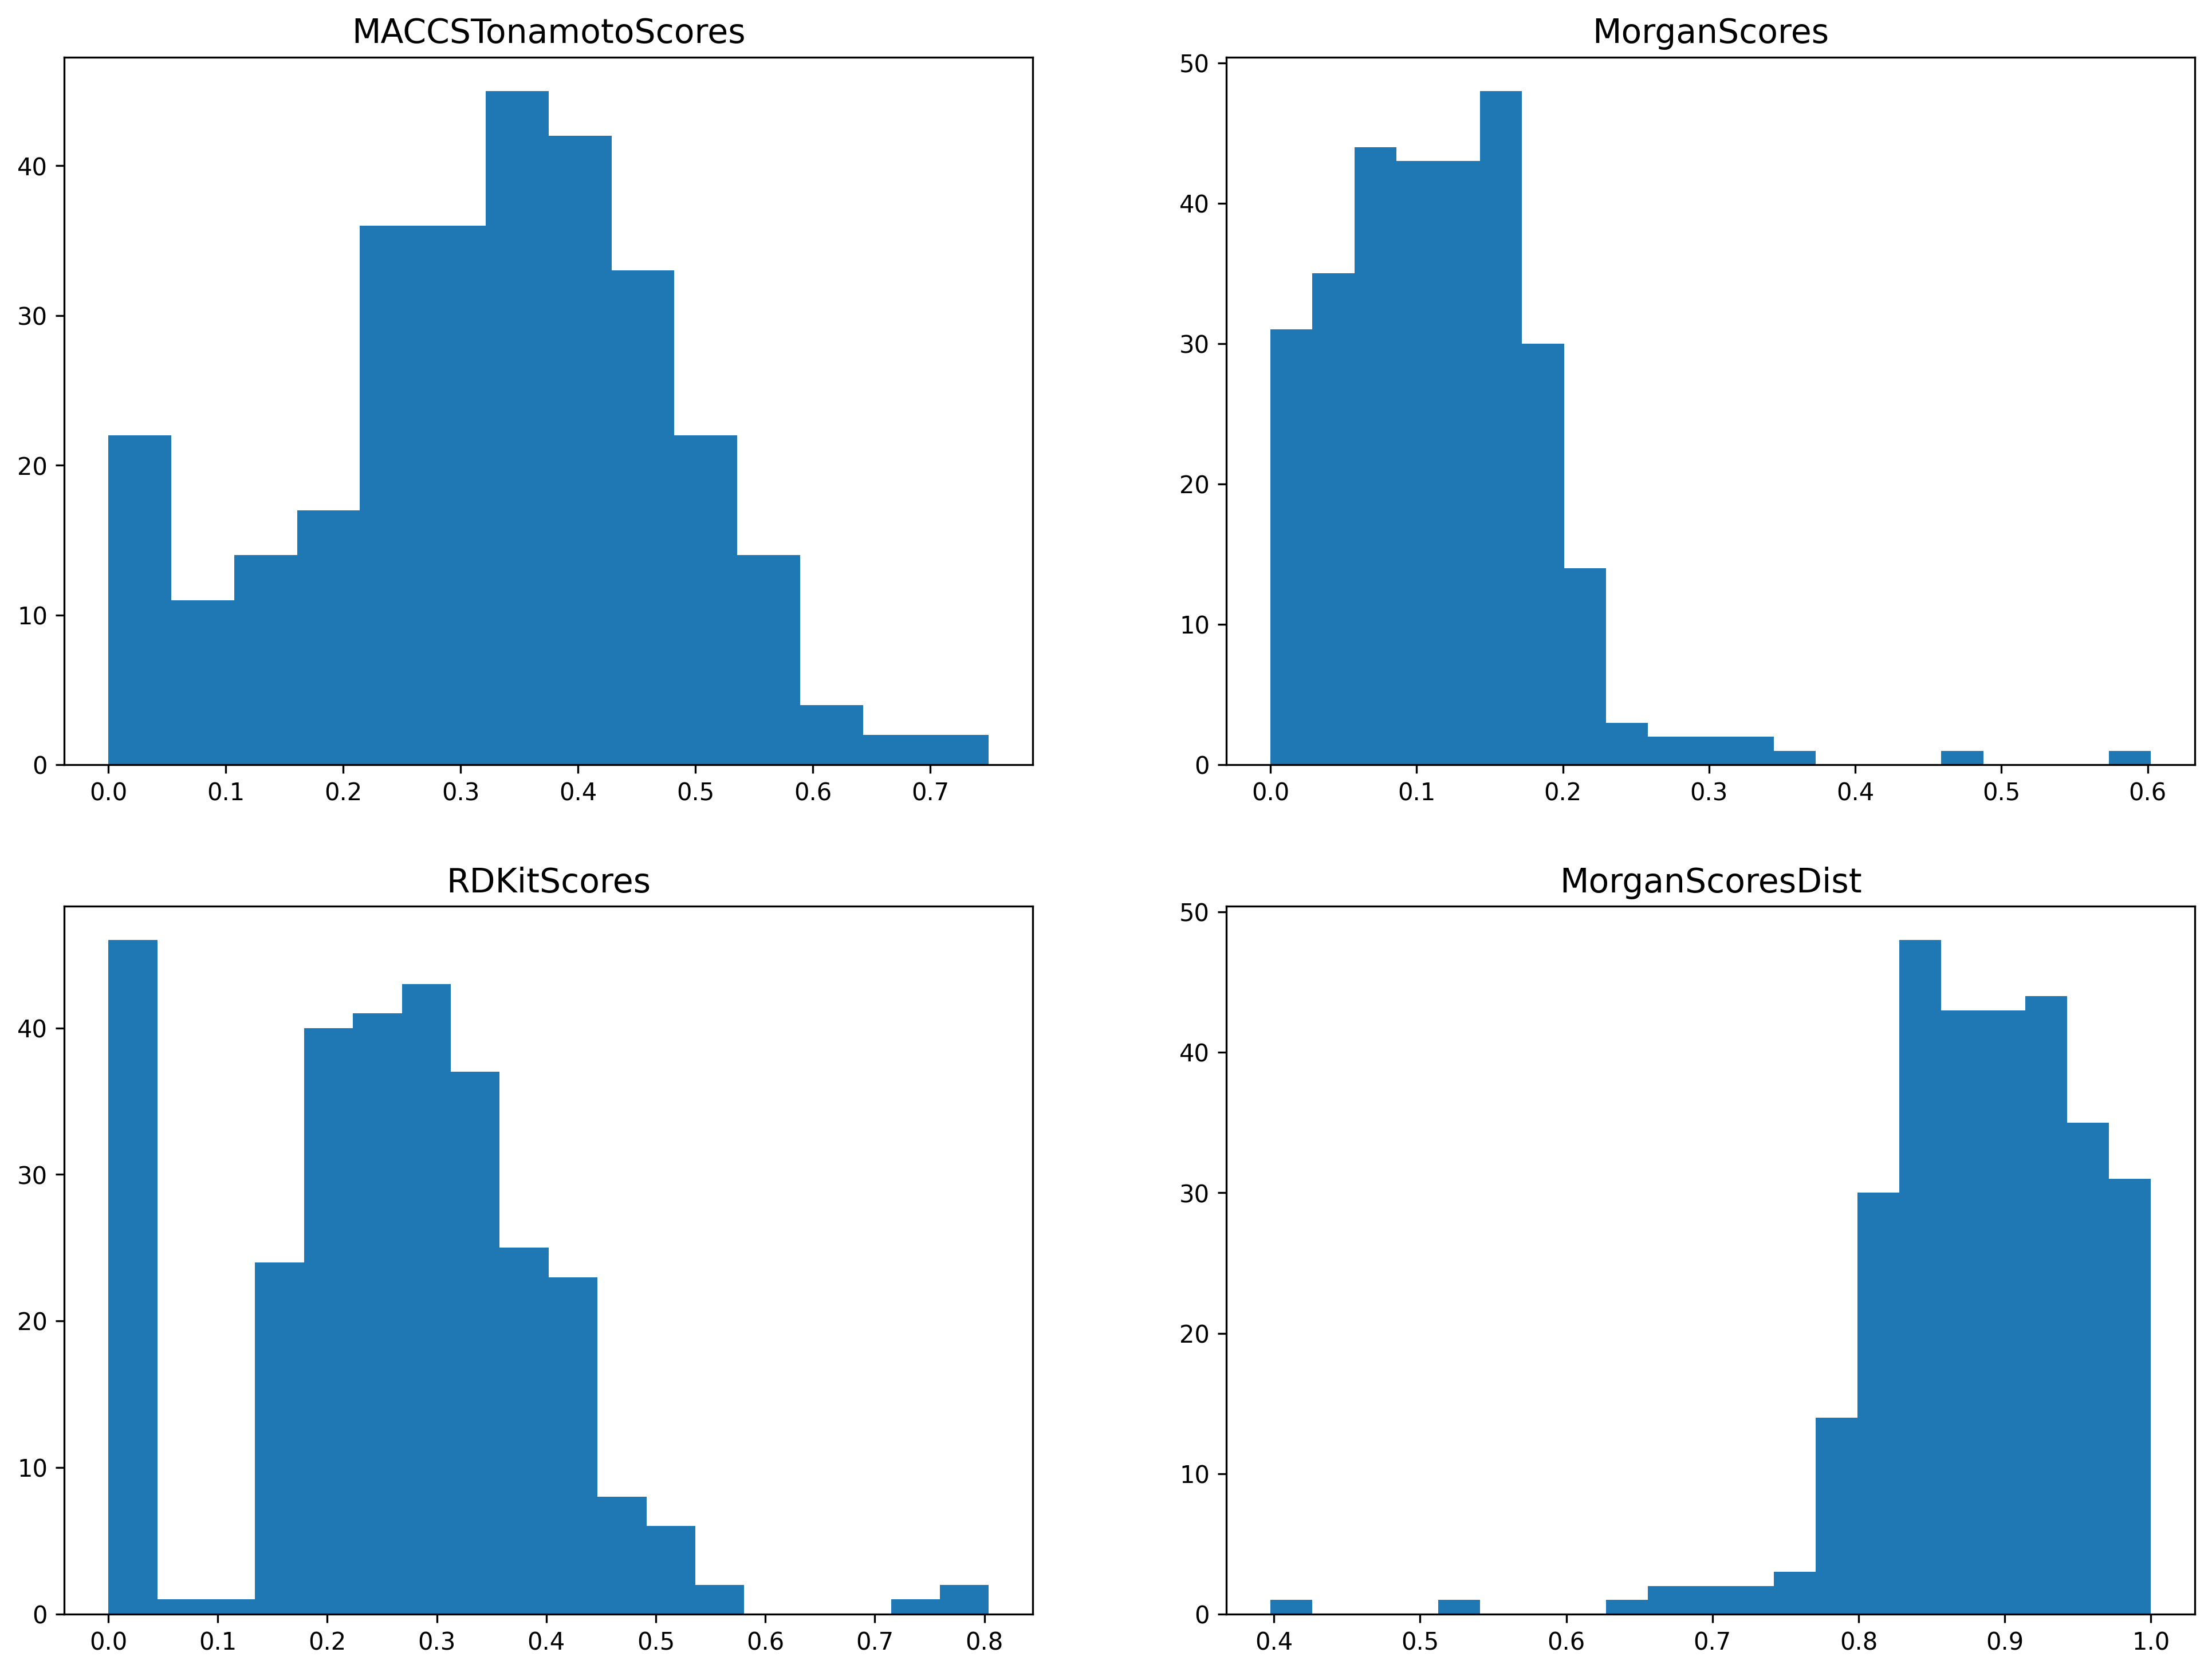

In [286]:
import matplotlib.pyplot as plt

gridsize = (2, 2)
fig = plt.figure(figsize=(16, 12), dpi = 300)
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (1, 0))
ax4 = plt.subplot2grid(gridsize, (1, 1))
ax1.set_title('MACCSTonamotoScores', fontsize = 14)
ax2.set_title('MorganScores', fontsize = 14)
ax3.set_title('RDKitScores', fontsize = 14)
ax4.set_title('MorganScoresDist', fontsize = 14)
ax1.hist(MACscores, bins = 'auto')
ax2.hist(MorganScores, bins = 'auto')
ax3.hist(RDKitScores, bins = 'auto')
ax4.hist(MorganScoresDist, bins = 'auto')

plt.show()

